In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
%pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: explainable-ai-sdk, tensorflow-cloud, tensorflow-decision-forests, tensorflow-serving-api, tensorflow-text, tensorflowjs, witwidget
Note: you may need to restart the kernel to use updated packages.


# import libraries

In [2]:
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
import PIL
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import data

In [3]:
non_demented = []
very_mild_demented = []
mild_demented = []
moderate_demented = []

# Download per category
for dirname, _, filenames in os.walk('/kaggle/input/fyp-dataset/non_demented'):
    for filename in filenames:
        non_demented.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/fyp-dataset/very_mild_demented'):
    for filename in filenames:
        very_mild_demented.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/fyp-dataset/mild_demented'):
    for filename in filenames:
        mild_demented.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/fyp-dataset/moderate_demented'):
    for filename in filenames:
        moderate_demented.append(os.path.join(dirname, filename))


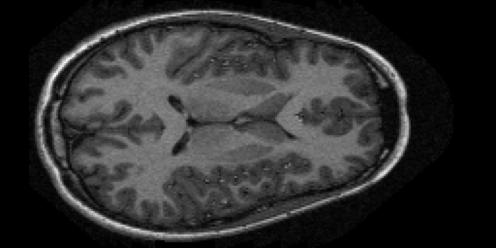

In [4]:
PIL.Image.open(str(non_demented[0]))

In [5]:
print(len(non_demented))
print(len(mild_demented))
print(len(moderate_demented))
print(len(very_mild_demented))

5000
5000
5000
5000


## **making a new dataset using minimum number of images contain in a category among all the category**

In [35]:
print(len(non_demented))
print(len(mild_demented))
print(len(moderate_demented))
print(len(very_mild_demented))

5000
5000
5000
5000


## One Hot Encoding
* 0 -> non_demented
* 1 -> mild_dementia
* 2 -> moderate_dementia
* 3 -> very_mild_dementia

In [6]:
encoder= OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

## Data proccessing
### transfer data into 128x128x3 shape

In [7]:
data = []
result = []
for s in non_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for s in mild_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())
        
for s in moderate_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())

for s in very_mild_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())


### Reshape the data

In [8]:
X=np.array(data)


In [9]:
X.shape

(20000, 128, 128, 3)

In [11]:
y=np.array(result)
y=y.reshape(X.shape[0],4)
y=np.argmax(y, axis=1)
y

array([0, 0, 0, ..., 3, 3, 3])

# splitting the data

In [12]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X_train.shape

(16000, 128, 128, 3)

In [14]:
X_test.shape

(4000, 128, 128, 3)

In [15]:
model_lenet = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes in the output layer
])

In [16]:
print(model_lenet.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 13456)             0         
                                                                 
 dense (Dense)               (None, 120)               1

In [21]:
from keras.utils import to_categorical

# Ensure input data has correct shape
X_train = X_train.reshape(-1, 128, 128, 3)
X_test = X_test.reshape(-1, 128, 128, 3)

# Ensure target labels are one-hot encoded
y_train_encoded = to_categorical(y_train, num_classes=4)
y_test_encoded = to_categorical(y_test, num_classes=4)
model_lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
y_test_encoded.shape

(4000, 4)

In [23]:
history= model_lenet.fit(X_train,y_train_encoded, validation_split=0.2,epochs=50,callbacks=[early_stopping],batch_size=32)

Epoch 1/50
400/400 [==============================] - 7s 8ms/step - loss: 2.9103 - accuracy: 0.7674 - val_loss: 0.1920 - val_accuracy: 0.9359
Epoch 2/50
400/400 [==============================] - 2s 6ms/step - loss: 0.1212 - accuracy: 0.9574 - val_loss: 0.0802 - val_accuracy: 0.9744
Epoch 3/50
400/400 [==============================] - 2s 6ms/step - loss: 0.0807 - accuracy: 0.9720 - val_loss: 0.1595 - val_accuracy: 0.9469
Epoch 4/50
400/400 [==============================] - 2s 6ms/step - loss: 0.0471 - accuracy: 0.9839 - val_loss: 0.0956 - val_accuracy: 0.9744
Epoch 5/50
400/400 [==============================] - 2s 6ms/step - loss: 0.0413 - accuracy: 0.9862 - val_loss: 0.0928 - val_accuracy: 0.9753
Epoch 6/50
400/400 [==============================] - 2s 6ms/step - loss: 0.0564 - accuracy: 0.9816 - val_loss: 0.1879 - val_accuracy: 0.9503
Epoch 7/50
400/400 [==============================] - 2s 6ms/step - loss: 0.0506 - accuracy: 0.9823 - val_loss: 0.1562 - val_accuracy: 0.9653
Epoch 

In [25]:
model_lenet.evaluate(X_test,y_test_encoded)

125/125 [==============================] - 0s 3ms/step - loss: 0.1477 - accuracy: 0.9718


[0.1476656198501587, 0.971750020980835]

In [27]:
score = model_lenet.evaluate(X_test,y_test_encoded)
test_loss = score[0] * 100
test_accuracy = score[1] * 100

print('Test Loss = {:.2f}%'.format(test_loss))
print('Test Accuracy = {:.2f}%'.format(test_accuracy))

125/125 [==============================] - 0s 3ms/step - loss: 0.1477 - accuracy: 0.9718
Test Loss = 14.77%
Test Accuracy = 97.18%


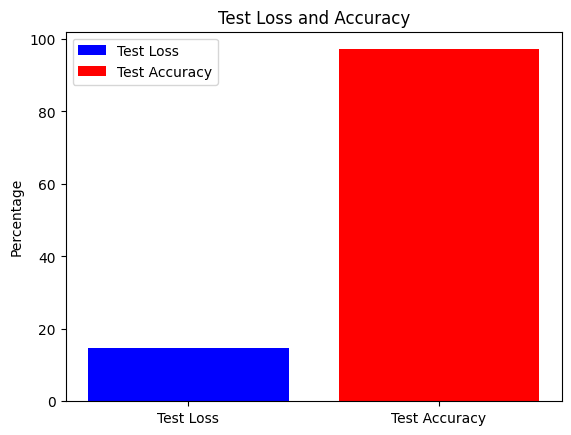

In [28]:
# Plotting
fig, ax = plt.subplots()

# Plot test loss
ax.bar('Test Loss', test_loss, color='b', label='Test Loss')
# Plot test accuracy
ax.bar('Test Accuracy', test_accuracy, color='r', label='Test Accuracy')

# Adding labels
ax.set_ylabel('Percentage')
ax.set_title('Test Loss and Accuracy')
ax.legend()

# Show plot
plt.show()

In [30]:
model_lenet.save('lenet_fyp.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


125/125 [==============================] - 0s 2ms/step
Test Accuracy = 0.97


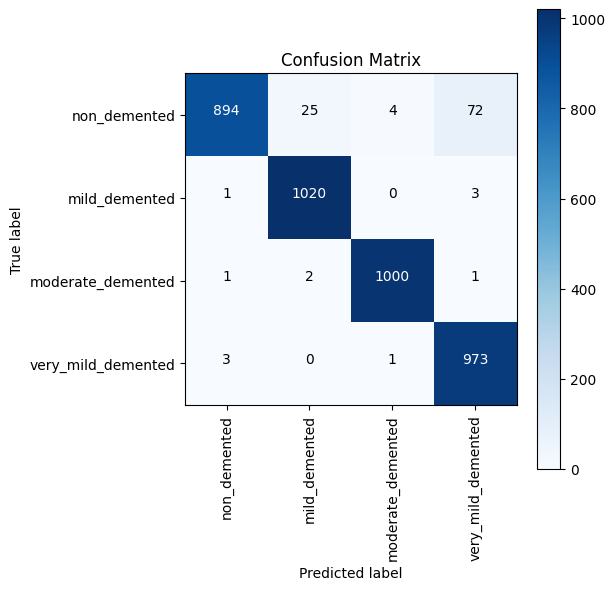

In [43]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Assuming model.predict(X_test) returns predictions and y_test is the true labels
predictions = model_lenet.predict(X_test)
y_pred = [np.argmax(probas) for probas in predictions]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy = %.2f' % accuracy)

# Calculate confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred) 

# Define test_labels
test_labels = {0: 'non_demented', 1: 'mild_demented', 2: 'moderate_demented', 3: 'very_mild_demented'}

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues, title='Confusion Matrix'):
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    pass

cm = plot_confusion_matrix(confusion_mtx, classes=list(test_labels.values()), normalize=False)


In [44]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred, target_names=list(test_labels.values())))


                    precision    recall  f1-score   support

      non_demented       0.99      0.90      0.94       995
     mild_demented       0.97      1.00      0.99      1024
 moderate_demented       1.00      1.00      1.00      1004
very_mild_demented       0.93      1.00      0.96       977

          accuracy                           0.97      4000
         macro avg       0.97      0.97      0.97      4000
      weighted avg       0.97      0.97      0.97      4000



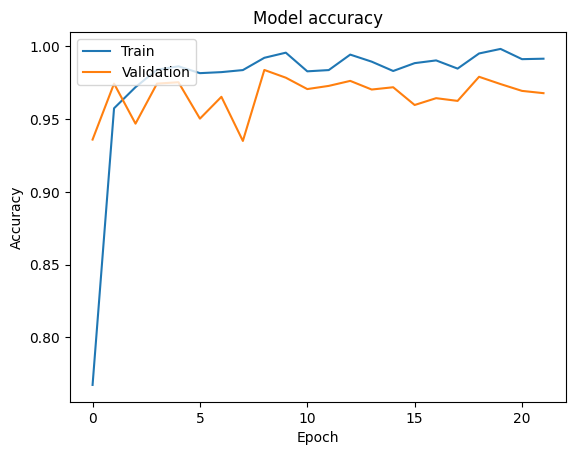

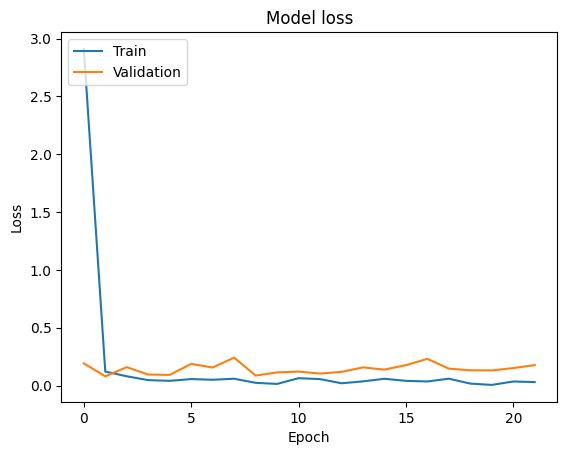

In [45]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Resnet

In [46]:
from keras.models import Model

class ResnetBlock(Model):

    def __init__(self, channels: int, down_sample=False):

        super().__init__()
        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]
        KERNEL_SIZE = (3, 3)

        INIT_SCHEME = "he_normal"
        
        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()
        
        if self.__down_sample:

            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()
            
    def call(self, inputs):
        res = inputs
        
        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)
        
        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out
    
class ResNet18(Model):
    
    def __init__(self, num_classes, **kwargs):

        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        return out

In [55]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D, Add, GlobalAveragePooling2D, Activation
from tensorflow.keras.callbacks import ModelCheckpoint


base_modelresnet = ResNet18(10)
base_modelresnet.build(input_shape = (None,128,128,3))
model=Sequential()
model.add(base_modelresnet)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(4,activation='softmax'))
checkpoint_cb = ModelCheckpoint("resnet.keras", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=10, restore_best_weights=True)
METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc')]
model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=METRICS)

In [64]:
X_train_new = X_train.astype('float32') / 255.0
X_test_new = X_test.astype('float32') / 255.0

In [69]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)


In [70]:
hist = model.fit(X_train_new,y_train_encoded, epochs=20, validation_split=0.2, callbacks=[early_stopping])

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [58]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [18]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

# Creating Model


In [44]:
model=Sequential()


In [45]:
model.add(Conv2D(filters=32,kernel_size=2,padding='Same',input_shape = (128,128,3)))

In [46]:
model.add(Conv2D(filters=32,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation='sigmoid'))

In [47]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_3 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)       

In [48]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [50]:
history= model.fit(X_train,y_train, validation_split=0.2,epochs=50,callbacks=[early_stopping],batch_size=32)

Epoch 1/50


2024-05-06 17:38:52.743098: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


400/400 [==============================] - 19s 38ms/step - loss: 1.3008 - accuracy: 0.6722 - val_loss: 0.7094 - val_accuracy: 0.7337
Epoch 2/50
400/400 [==============================] - 15s 37ms/step - loss: 0.4183 - accuracy: 0.8247 - val_loss: 0.4176 - val_accuracy: 0.8525
Epoch 3/50
400/400 [==============================] - 15s 37ms/step - loss: 0.3151 - accuracy: 0.8742 - val_loss: 0.2343 - val_accuracy: 0.9141
Epoch 4/50
400/400 [==============================] - 15s 37ms/step - loss: 0.2500 - accuracy: 0.9008 - val_loss: 0.1753 - val_accuracy: 0.9369
Epoch 5/50
400/400 [==============================] - 15s 37ms/step - loss: 0.2154 - accuracy: 0.9129 - val_loss: 0.2375 - val_accuracy: 0.9153
Epoch 6/50
400/400 [==============================] - 15s 37ms/step - loss: 0.1767 - accuracy: 0.9285 - val_loss: 0.1071 - val_accuracy: 0.9691
Epoch 7/50
400/400 [==============================] - 15s 37ms/step - loss: 0.1610 - accuracy: 0.9337 - val_loss: 0.0860 - val_accuracy: 0.9734
Epo

In [51]:
model.evaluate(X_test,y_test)

125/125 [==============================] - 1s 8ms/step - loss: 0.0485 - accuracy: 0.9927


[0.04854288324713707, 0.9927499890327454]

In [52]:
score = model.evaluate(X_test,y_test)
test_loss = score[0] * 100
test_accuracy = score[1] * 100

print('Test Loss = {:.2f}%'.format(test_loss))
print('Test Accuracy = {:.2f}%'.format(test_accuracy))

125/125 [==============================] - 1s 8ms/step - loss: 0.0485 - accuracy: 0.9927
Test Loss = 4.85%
Test Accuracy = 99.27%


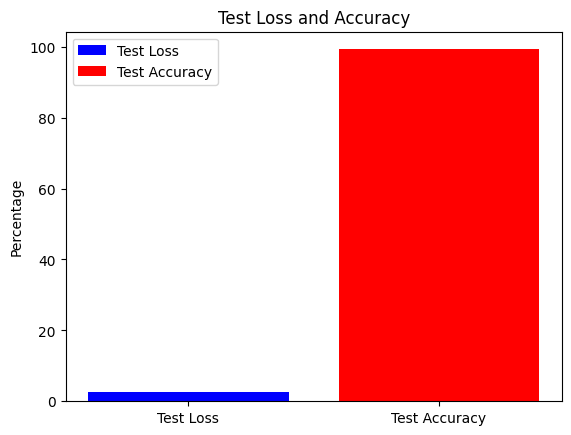

In [59]:
test_loss = 2.56  # Example value
test_accuracy = 99.27  # Example value

# Plotting
fig, ax = plt.subplots()

# Plot test loss
ax.bar('Test Loss', test_loss, color='b', label='Test Loss')
# Plot test accuracy
ax.bar('Test Accuracy', test_accuracy, color='r', label='Test Accuracy')

# Adding labels
ax.set_ylabel('Percentage')
ax.set_title('Test Loss and Accuracy')
ax.legend()

# Show plot
plt.show()

In [24]:
model.save('new2_custom_fyp.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


125/125 [==============================] - 1s 7ms/step
Test Accuracy = 0.95


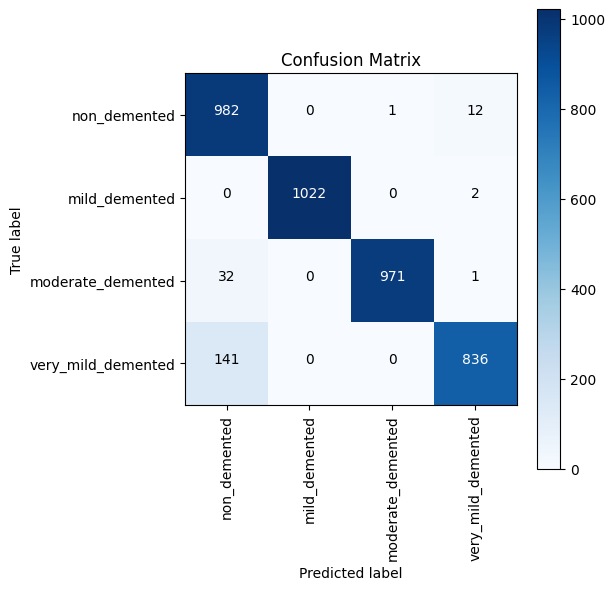

In [53]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Assuming model.predict(X_test) returns predictions and y_test is the true labels
predictions = model.predict(X_test)
y_pred = [np.argmax(probas) for probas in predictions]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy = %.2f' % accuracy)

# Calculate confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred) 

# Define test_labels
test_labels = {0: 'non_demented', 1: 'mild_demented', 2: 'moderate_demented', 3: 'very_mild_demented'}

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues, title='Confusion Matrix'):
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    pass

cm = plot_confusion_matrix(confusion_mtx, classes=list(test_labels.values()), normalize=False)


In [54]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred, target_names=list(test_labels.values())))


                    precision    recall  f1-score   support

      non_demented       0.85      0.99      0.91       995
     mild_demented       1.00      1.00      1.00      1024
 moderate_demented       1.00      0.97      0.98      1004
very_mild_demented       0.98      0.86      0.91       977

          accuracy                           0.95      4000
         macro avg       0.96      0.95      0.95      4000
      weighted avg       0.96      0.95      0.95      4000



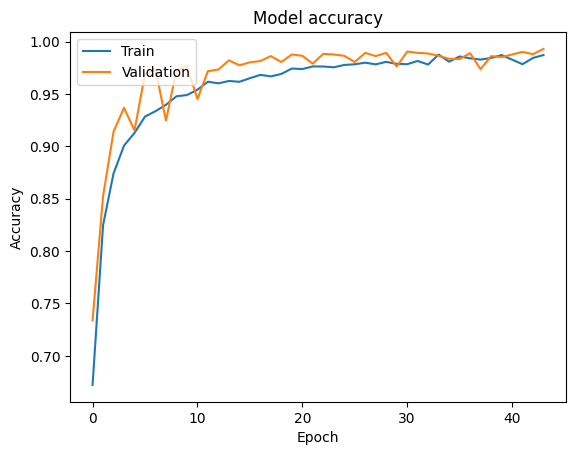

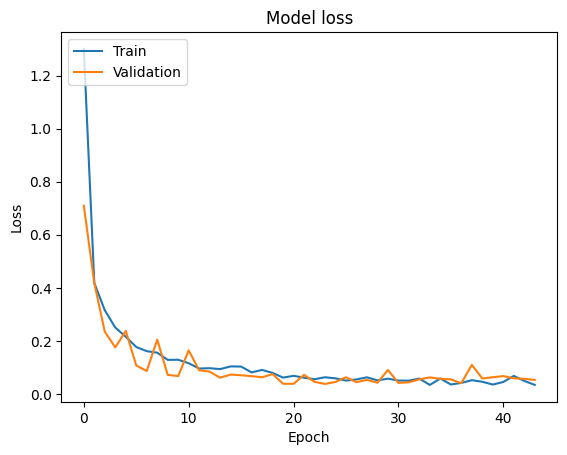

In [55]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()